In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import covid_19_shared




In [8]:
all_countries = covid_19_shared.list_of_JHUD_countries()
all_countries


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [2]:
Country = "US"
# Country = "Italy"
# Country = "India"
# Country = "Australia"
Country = "Russia"
Country = "Turkey"
cv_data = covid_19_shared.load_JHUD_global(Country)


Date
2020-10-11    231.0
2020-10-12    255.0
2020-10-13    256.0
2020-10-14    218.0
2020-10-15    316.0
dtype: float64


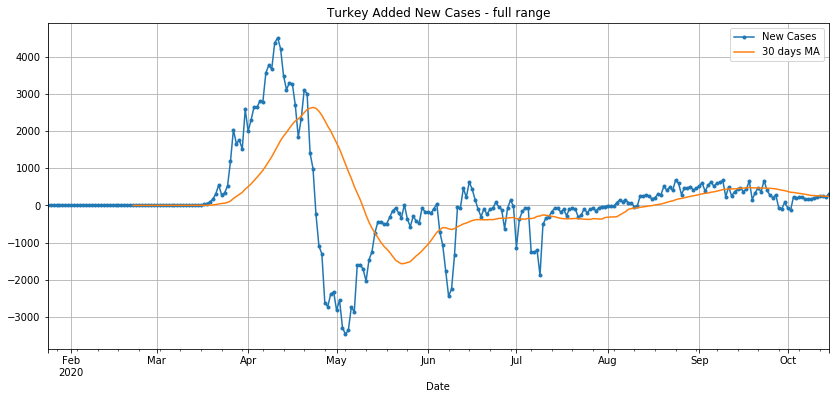

Deaths Per Day
Date
2020-10-11    59.0
2020-10-12    58.0
2020-10-13    62.0
2020-10-14    57.0
2020-10-15    66.0
Name: Dead, dtype: float64


In [3]:
def growth_pcnt(ser): 
    return (ser - ser.shift(1)) / ser * 100

confirmed_new = (cv_data.Confirmed - cv_data.Confirmed.shift(1)).dropna()
dead_new = (cv_data.Dead - cv_data.Dead.shift(1)).dropna()
recovered_new = (cv_data.Recovered - cv_data.Recovered.shift(1)).dropna()

deaths_new_pcnt = growth_pcnt(cv_data.Dead)
confirmed_new_pcnt = growth_pcnt(cv_data.Confirmed)

growth = pd.Series((confirmed_new - (dead_new + recovered_new)).array
                   , index=cv_data.index[1:]).dropna()

print(growth.tail(5))

growth.plot(figsize=(14, 6)
            , title=f'{Country} Added New Cases - full range'
            , legend=True
            , label="New Cases"
            , style='.-')
growth.rolling(30).mean().plot(grid=True, legend=True, label="30 days MA")
plt.show()



df_data = dead_new[60:].dropna()
df_ma = dead_new[30:].rolling(30).mean().dropna()

print("Deaths Per Day\n" + str(dead_new.tail()))



Deaths Per Day
            Daily Deaths Addition
Date                             
2020-10-11                   59.0
2020-10-12                   58.0
2020-10-13                   62.0
2020-10-14                   57.0
2020-10-15                   66.0


<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

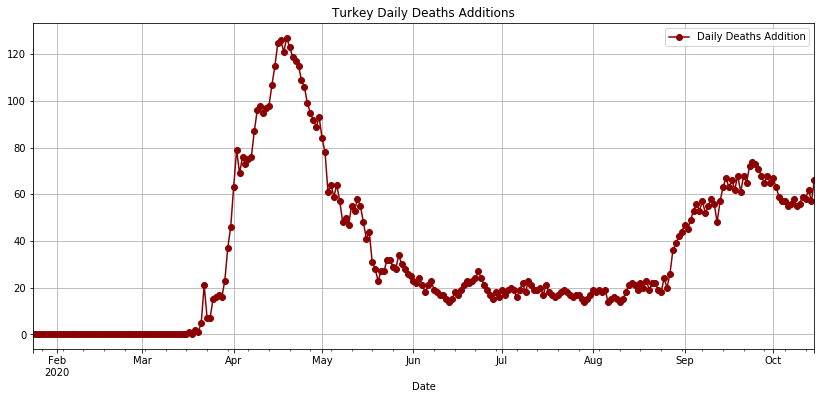

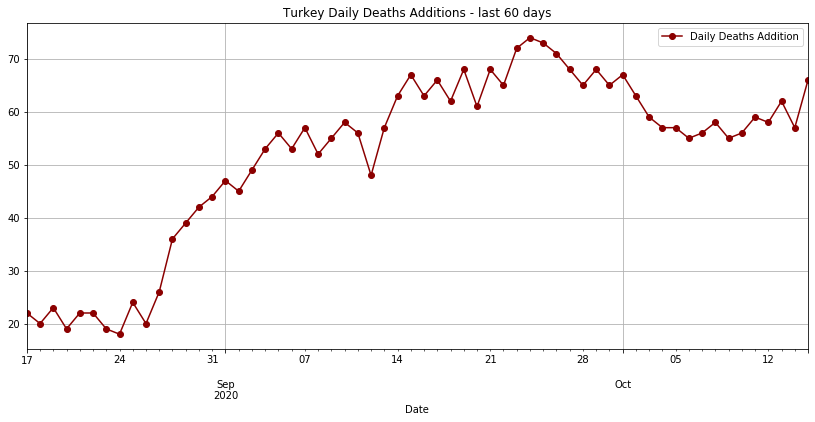

In [4]:
plt.figure(figsize = (15,10))

df = pd.DataFrame({"Daily Deaths Addition" :  dead_new}, index=dead_new.index)
plt.figure(figsize = (15,10))

print("Deaths Per Day\n" + str(df.tail()))
df.plot(title = f'{Country} Daily Deaths Additions'
        , grid = True
        , legend = True
        , style = '-o'
        , figsize=(14, 6)
        , color = ["darkred"]
       )
plt.show()
df[-60:].plot(title = f'{Country} Daily Deaths Additions - last 60 days'
        , grid = True
        , legend = True
        , style = '-o'
        , figsize=(14, 6)
        , color = ["darkred"]
       )
plt.show()

New Cases Per Day
            Daily Cases Addition
Date                            
2020-10-11                1502.0
2020-10-12                1614.0
2020-10-13                1632.0
2020-10-14                1671.0
2020-10-15                1693.0


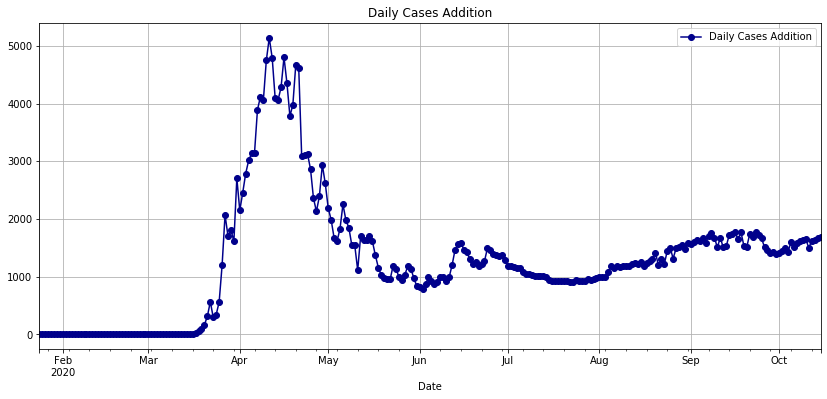

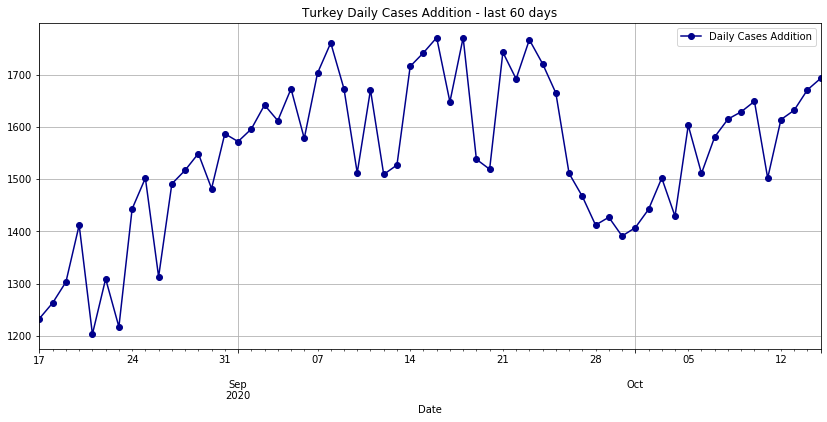

In [5]:
df = pd.DataFrame({"Daily Cases Addition" : confirmed_new}, index=dead_new.index)
print("New Cases Per Day\n" + str(df.tail()))
df.plot(title = "Daily Cases Addition"
        , grid = True
        , legend = True
        , style = '-o'
        , figsize=(14, 6)
        , color = ["darkblue"]
       )
plt.show()

df[-60:].plot(title = f"{Country} Daily Cases Addition - last 60 days"
        , grid = True
        , legend = True
        , style = '-o'
        , figsize=(14, 6)
        , color = ["darkblue"]
       )
plt.show()

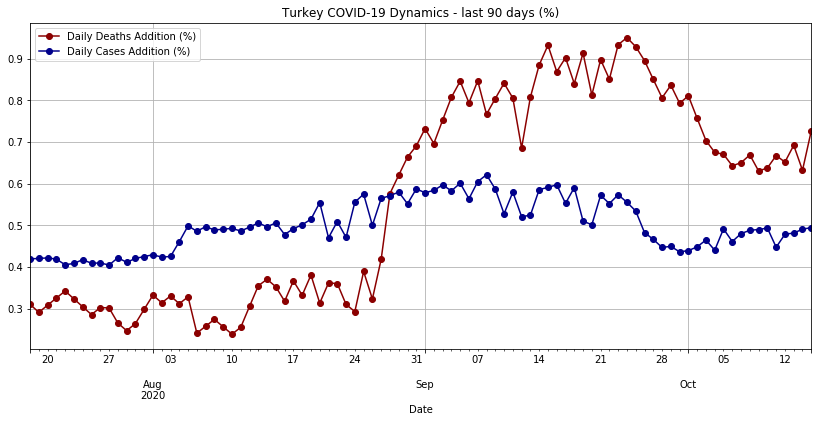

In [6]:
df = pd.DataFrame({"Daily Deaths Addition (%)" : deaths_new_pcnt
                      , "Daily Cases Addition (%)" : confirmed_new_pcnt}
                  , index=deaths_new_pcnt.index)['2020-03-01':]

# df.plot(title = "COVID-19 Dynamics (%)"
#         , grid = True
#         , legend = True
#         , style = '-o'
#         , figsize=(14, 6)
#         , color = ["darkred", "darkblue"]
#        )

# Last 90 days

df = df[-90:]
df.plot(title = f'{Country} COVID-19 Dynamics - last 90 days (%)'
        , grid = True
        , legend = True
        , style = '-o'
        , figsize=(14, 6)
        , color = ["darkred", "darkblue"]
       )
